# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

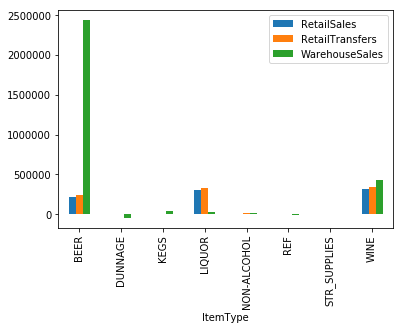

In [62]:
data.groupby('ItemType')[['RetailSales','RetailTransfers','WarehouseSales']].sum().plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

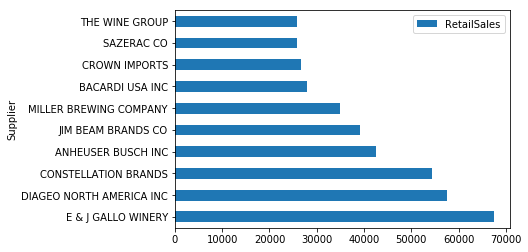

In [63]:
data[['RetailSales', 'Supplier']].groupby(['Supplier']).agg('sum').nlargest(10,'RetailSales').plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

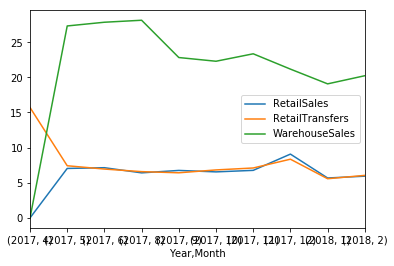

In [64]:
data.groupby(['Year','Month'])[['RetailSales','RetailTransfers','WarehouseSales']].mean().plot()

## 4. Plot the same information as above but as a bar chart.

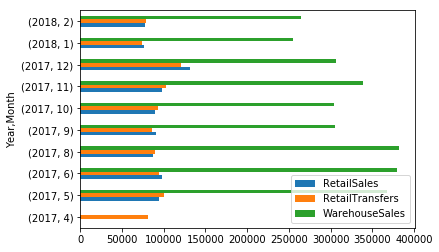

In [65]:
data.groupby(['Year','Month'])[['RetailSales','RetailTransfers','WarehouseSales']].sum().plot.barh()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [66]:
data.groupby(['Month','Year','ItemType'])[['RetailSales']].sum() #.plot()

RetailSales
Month Year ItemType                 
1     2018 BEER             16606.33
           DUNNAGE              0.00
           KEGS                 0.00
           LIQUOR           28579.87
           NON-ALCOHOL        732.25
           REF                 23.66
           STR_SUPPLIES        56.94
           WINE             29792.72
2     2018 BEER             18640.31
           DUNNAGE              0.00
           KEGS                 0.00
           LIQUOR           28852.31
           NON-ALCOHOL        812.84
           REF                 41.52
           STR_SUPPLIES        47.76
           WINE             29409.39
4     2017 BEER                 0.00
           LIQUOR               0.00
           NON-ALCOHOL          0.00
           REF                  0.00
           STR_SUPPLIES         0.00
           WINE                 0.00
5     2017 BEER             25023.24
           LIQUOR           35123.36
           WINE             34546.89
6     2017 BEER             27863.26
           DUNNAGE              0.00
           KEGS                 0.00
           LIQUOR           35035.31
           NON-ALCOHOL       1209.23
...                              ...
9     2017 KEGS                 0.00
           LIQUOR           32532.32
           NON-ALCOHOL        997.11
           REF                 38.88
           STR_SUPPLIES        94.64
           WINE             32936.89
10    2017 BEER             22583.78
           DUNNAGE              0.00
           KEGS                 0.00
           LIQUOR           32491.59
           NON-ALCOHOL        945.63
           REF                 22.82
           STR_SUPPLIES        84.38
           WINE             33108.76
11    2017 BEER             23341.14
           DUNNAGE              0.00
           KEGS                 0.00
           LIQUOR           35524.77
           NON-ALCOHOL       1005.19
           REF                 63.11
           STR_SUPPLIES       106.06
           WINE             38275.92
12    2017 BEER             28822.16
           DUNNAGE              0.00
           KEGS                 0.00
           LIQUOR           49522.28
           NON-ALCOHOL       1316.44
           REF                 41.21
           STR_SUPPLIES       439.64
           WINE             51492.76

[73 rows x 1 columns]

In [67]:
data.reset_index(inplace=True)
data['Date']=pd.to_datetime(data['Month'].astype(str)+' '+ data['Year'].astype(str))

data.drop(['Month','Year'],axis=1, inplace=True)
data
data['date'] = data.Date.data.date
sorted(data.date.unique())

NameError: name 'dt' is not defined

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*